## modeling with AutoML

In [289]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy import interpolate
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'

In [153]:
forecast_weather = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/solar_forecast_weather.csv')
solar = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/solar_power_2204.csv')
real_weather = pd.read_csv('../../Data/capstone/total_eda_real.csv')
solar_2 = pd.read_csv('../../Data/capstone/발전소/하동_eda.csv')

In [154]:
def time_change(data, Forecast_time):
    """
    data = forecast가 있는 데이터
    Forecast_time = 예보시간

    return = 예보시간을 기준으로 데이터를 정렬한 데이터
    """
    data[Forecast_time] = pd.to_datetime(data[Forecast_time])
    data['real_time'] = data.apply(lambda row: row['Forecast time'] + datetime.timedelta(hours=row['forecast']), axis=1)
    forecast_weather_eda = data.groupby(['real_time']).mean().drop('forecast', axis=1)
    forecast_weather_eda.reset_index(inplace=True)
    return forecast_weather_eda

In [155]:
eda_forecast = time_change(forecast_weather, 'Forecast time')

In [156]:
eda_forecast

,real_time,temperature,humidity,windspeed,winddirection
0,2020-09-01 15:00:00,31.0,65.000000,3.00,101.000000
1,2020-09-01 18:00:00,29.0,80.000000,2.40,90.000000
2,2020-09-01 21:00:00,26.0,90.000000,1.80,66.333333
3,2020-09-02 00:00:00,25.5,90.000000,1.75,48.000000
4,2020-09-02 03:00:00,25.0,90.000000,1.90,44.200000
...,...,...,...,...,...
11236,2022-07-03 20:00:00,26.0,80.000000,2.50,78.000000
11237,2022-07-03 21:00:00,26.0,81.666667,2.10,76.000000
11238,2022-07-03 22:00:00,25.0,85.000000,1.70,65.000000
11239,2022-07-03 23:00:00,25.0,85.000000,1.60,43.000000


In [157]:
solar['datetime'] = pd.to_datetime(solar['datetime'])
solar.target.replace(65535.0, solar.target.mean(), inplace=True)
solar['month'] = solar.datetime.dt.month
solar['hour'] = solar.datetime.dt.hour
solar['year'] = solar.datetime.dt.year
solar['day'] = solar.datetime.dt.day
solar_eda = solar.groupby(['year','month','day','hour']).mean().reset_index()
solar_eda['date'] = pd.to_datetime(solar_eda[['year', 'month', 'day', 'hour']])

In [158]:
solar_eda.dropna()

,year,month,day,hour,target,date
11,2020,9,10,11,733.260000,2020-09-10 11:00:00
12,2020,9,10,12,645.433333,2020-09-10 12:00:00
13,2020,9,10,13,605.308333,2020-09-10 13:00:00
14,2020,9,10,14,665.733333,2020-09-10 14:00:00
15,2020,9,10,15,522.251667,2020-09-10 15:00:00
...,...,...,...,...,...,...
14347,2022,4,30,19,0.850000,2022-04-30 19:00:00
14348,2022,4,30,20,0.000000,2022-04-30 20:00:00
14349,2022,4,30,21,0.000000,2022-04-30 21:00:00
14350,2022,4,30,22,0.000000,2022-04-30 22:00:00


In [159]:
incheon = real_weather[real_weather['지점명'] =='인천']

In [160]:
eda_weather = incheon.drop(['지점', '지점명'], axis=1)

In [161]:
eda_weather['일시'] = pd.to_datetime(eda_weather['일시'])

In [162]:
eda_weather['hour'] = eda_weather['일시'].dt.hour
eda_weather['month'] = eda_weather['일시'].dt.month
eda_weather['year'] = eda_weather['일시'].dt.year

eda_weather.drop(['위도','경도'], axis=1, inplace=True)

In [163]:
eda_weather

,위도,경도,일시,기온,풍속,풍향,습도,강수량,hour,month,year
209952,37.4777,126.6249,2021-01-01 00:00:00,-7.5,2.0,20.0,62.0,0.0,0,1,2021
209953,37.4777,126.6249,2021-01-01 01:00:00,-7.8,1.9,50.0,63.0,0.0,1,1,2021
209954,37.4777,126.6249,2021-01-01 02:00:00,-7.8,1.0,20.0,61.0,0.0,2,1,2021
209955,37.4777,126.6249,2021-01-01 03:00:00,-8.0,1.9,50.0,60.0,0.0,3,1,2021
209956,37.4777,126.6249,2021-01-01 04:00:00,-7.9,1.9,70.0,58.0,0.0,4,1,2021
...,...,...,...,...,...,...,...,...,...,...,...
227443,37.4777,126.6249,2022-12-30 20:00:00,-2.6,3.0,320.0,63.0,0.0,20,12,2022
227444,37.4777,126.6249,2022-12-30 21:00:00,-2.9,3.0,320.0,66.0,0.0,21,12,2022
227445,37.4777,126.6249,2022-12-30 22:00:00,-3.4,2.1,360.0,67.0,0.0,22,12,2022
227446,37.4777,126.6249,2022-12-30 23:00:00,-3.6,2.2,320.0,67.0,0.0,23,12,2022


In [164]:
eda_weather.set_index('일시', inplace=True)

In [165]:
eda_weather

,위도,경도,기온,풍속,풍향,습도,강수량,hour,month,year
일시,,,,,,,,,,
2021-01-01 00:00:00,37.4777,126.6249,-7.5,2.0,20.0,62.0,0.0,0,1,2021
2021-01-01 01:00:00,37.4777,126.6249,-7.8,1.9,50.0,63.0,0.0,1,1,2021
2021-01-01 02:00:00,37.4777,126.6249,-7.8,1.0,20.0,61.0,0.0,2,1,2021
2021-01-01 03:00:00,37.4777,126.6249,-8.0,1.9,50.0,60.0,0.0,3,1,2021
2021-01-01 04:00:00,37.4777,126.6249,-7.9,1.9,70.0,58.0,0.0,4,1,2021
...,...,...,...,...,...,...,...,...,...,...
2022-12-30 20:00:00,37.4777,126.6249,-2.6,3.0,320.0,63.0,0.0,20,12,2022
2022-12-30 21:00:00,37.4777,126.6249,-2.9,3.0,320.0,66.0,0.0,21,12,2022
2022-12-30 22:00:00,37.4777,126.6249,-3.4,2.1,360.0,67.0,0.0,22,12,2022


In [166]:
solar_eda.set_index('date', inplace=True)

In [167]:
total_time = pd.date_range(start='2021-01-01 00:00:00', end='2022-04-30 23:00:00', freq='H')

In [168]:
total_time

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               ...
               '2022-04-30 14:00:00', '2022-04-30 15:00:00',
               '2022-04-30 16:00:00', '2022-04-30 17:00:00',
               '2022-04-30 18:00:00', '2022-04-30 19:00:00',
               '2022-04-30 20:00:00', '2022-04-30 21:00:00',
               '2022-04-30 22:00:00', '2022-04-30 23:00:00'],
              dtype='datetime64[ns]', length=11640, freq='H')

y = solar_eda.loc[total_time].target

In [169]:
solar_2.date = pd.to_datetime(solar_2.date)

In [170]:
solar_2.set_index('date', inplace=True)

In [171]:
y = solar_2.loc[total_time].value

In [173]:
eda_weather.drop(['위도', '경도'], axis=1, inplace=True)

In [174]:
x = eda_weather.loc['2021-01-01 00:00:00' : '2022-04-30 23:00:00']

In [240]:
comm = y.index.intersection(x.index)

In [241]:
comm_2 = x.index.intersection(y.index)

In [242]:
x = x.loc[comm]

In [243]:
y = y.loc[comm]

In [244]:
x = x.loc[comm_2]
y = y.loc[comm_2]

In [245]:
y_input = y.loc[('2022-01-14 00:00:00' > y.index) | (y.index > '2022-01-17 23:00:00')]

In [246]:
x_input = x.loc[('2022-01-14 00:00:00' > x.index) | (x.index > '2022-01-17 23:00:00')]

In [247]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [248]:
sc = StandardScaler()

In [249]:
mn = MinMaxScaler()

In [302]:
slice = 8760

In [303]:
x_train = x_input.iloc[:slice]
x_test = x_input.iloc[slice:]
y_train = y_input.iloc[:slice]
y_test = y_input.iloc[slice:]

In [304]:
mn.fit(x_train)

MinMaxScaler()

In [305]:
sc_x_train = mn.transform(x_train)
sc_x_test = mn.transform(x_test)

In [306]:
mn.fit(y_train.values.reshape(-1,1))

MinMaxScaler()

In [307]:
sc_y_train = mn.transform(y_train.values.reshape(-1,1)).reshape(-1)
sc_y_test = mn.transform(y_test.values.reshape(-1,1))

In [308]:
print(len(sc_x_train), len(sc_x_test), len(sc_y_train), len(sc_y_test))

8760 2783 8760 2783


In [309]:
from pycaret.regression import *

In [310]:
reg = setup(data = sc_x_train, 
            target = sc_y_train,
            fold=5)

In [311]:
best_model = compare_models(sort='RMSE', n_select=10)

In [312]:
model_results = pull()

In [313]:
model_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.0598,0.0125,0.1117,0.8332,0.0818,2.7098,0.342
rf,Random Forest Regressor,0.0566,0.0128,0.1128,0.8301,0.0825,1.5775,0.462
et,Extra Trees Regressor,0.0588,0.0138,0.1174,0.8158,0.0857,1.7266,0.412
gbr,Gradient Boosting Regressor,0.0740,0.0151,0.1227,0.7991,0.0906,4.1091,0.406
knn,K Neighbors Regressor,0.0715,0.0171,0.1304,0.7723,0.0960,5.3724,0.328
ada,AdaBoost Regressor,0.0834,0.0193,0.1390,0.7425,0.0993,3.8785,0.340
dt,Decision Tree Regressor,0.0689,0.0233,0.1526,0.6893,0.1115,1.8372,0.328
lar,Least Angle Regression,0.1924,0.0608,0.2465,0.1896,0.1867,20.4330,0.324
br,Bayesian Ridge,0.1924,0.0608,0.2465,0.1895,0.1867,20.4466,0.326
ridge,Ridge Regression,0.1924,0.0608,0.2465,0.1896,0.1867,20.4472,0.378


In [314]:
best_model

[LGBMRegressor(random_state=2910),
 RandomForestRegressor(n_jobs=-1, random_state=2910),
 ExtraTreesRegressor(n_jobs=-1, random_state=2910),
 GradientBoostingRegressor(random_state=2910),
 KNeighborsRegressor(n_jobs=-1),
 AdaBoostRegressor(random_state=2910),
 DecisionTreeRegressor(random_state=2910),
 Lars(random_state=2910),
 BayesianRidge(),
 Ridge(random_state=2910)]

In [315]:
lgbr = create_model('lightgbm')
rf = create_model('rf')
extra = create_model('et')
gradient = create_model('gbr')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:03:05
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0532,0.0098,0.0990,0.8659,0.0729,2.6630
1,0.0636,0.0144,0.1202,0.8100,0.0880,4.1713
2,0.0602,0.0121,0.1099,0.8419,0.0809,1.4023
3,0.0593,0.0122,0.1106,0.8375,0.0817,2.0550
4,0.0627,0.0141,0.1187,0.8107,0.0854,3.2575
Mean,0.0598,0.0125,0.1117,0.8332,0.0818,2.7098
Std,0.0037,0.0017,0.0076,0.0210,0.0051,0.9567


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:03:07
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0517,0.0107,0.1035,0.8536,0.0763,1.9034
1,0.0602,0.0146,0.1208,0.8081,0.0885,2.3745
2,0.0573,0.0122,0.1103,0.8405,0.0814,1.1451
3,0.0555,0.0125,0.1118,0.8340,0.0821,1.2563
4,0.0585,0.0138,0.1176,0.8140,0.0844,1.2083
Mean,0.0566,0.0128,0.1128,0.8301,0.0825,1.5775
Std,0.0029,0.0014,0.0060,0.0168,0.0040,0.4833


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:03:10
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0544,0.0119,0.1089,0.8378,0.0803,2.0238
1,0.0629,0.0159,0.1260,0.7912,0.0920,2.8895
2,0.0595,0.0135,0.1161,0.8234,0.0851,1.1574
3,0.0562,0.0132,0.1150,0.8242,0.0843,1.1973
4,0.0610,0.0147,0.1212,0.8024,0.0870,1.3649
Mean,0.0588,0.0138,0.1174,0.8158,0.0857,1.7266
Std,0.0031,0.0014,0.0058,0.0167,0.0038,0.6596


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:03:12
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0698,0.0129,0.1136,0.8235,0.0840,4.5111
1,0.0763,0.0162,0.1273,0.7868,0.0941,7.5893
2,0.0749,0.0151,0.1227,0.8027,0.0915,1.8442
3,0.0755,0.0158,0.1256,0.7904,0.0928,2.8805
4,0.0734,0.0155,0.1244,0.7919,0.0906,3.7206
Mean,0.0740,0.0151,0.1227,0.7991,0.0906,4.1091
Std,0.0023,0.0012,0.0048,0.0133,0.0035,1.9526


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [316]:
lgbr_best = tune_model(lgbr)
rf_best = tune_model(rf)
extra_best = tune_model(extra)
gradient_best = tune_model(gradient)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:03:15
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0760,0.0146,0.1207,0.8009,0.0885,6.5476
1,0.0838,0.0180,0.1340,0.7636,0.0986,8.8197
2,0.0833,0.0170,0.1305,0.7768,0.0963,2.5708
3,0.0825,0.0173,0.1314,0.7705,0.0964,3.8541
4,0.0818,0.0174,0.1317,0.7667,0.0954,6.0662
Mean,0.0815,0.0168,0.1297,0.7757,0.0950,5.5717
Std,0.0028,0.0012,0.0047,0.0133,0.0034,2.1772


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0760,0.0146,0.1207,0.8009,0.0885,6.5476
1,0.0838,0.0180,0.1340,0.7636,0.0986,8.8197
2,0.0833,0.0170,0.1305,0.7768,0.0963,2.5708
3,0.0825,0.0173,0.1314,0.7705,0.0964,3.8541
4,0.0818,0.0174,0.1317,0.7667,0.0954,6.0662
Mean,0.0815,0.0168,0.1297,0.7757,0.0950,5.5717
Std,0.0028,0.0012,0.0047,0.0133,0.0034,2.1772


Fitting 5 folds for each of 10 candidates, totalling 50 fits


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:03:42
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0662,0.0128,0.1131,0.8251,0.0822,3.8981
1,0.0739,0.0165,0.1284,0.7832,0.0936,6.1619
2,0.0707,0.0145,0.1205,0.8099,0.0879,2.0412
3,0.0703,0.0148,0.1217,0.8031,0.0884,3.5284
4,0.0725,0.0161,0.1267,0.7842,0.0905,4.4318
Mean,0.0707,0.0149,0.1221,0.8011,0.0885,4.0123
Std,0.0026,0.0013,0.0054,0.0159,0.0037,1.3364


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0662,0.0128,0.1131,0.8251,0.0822,3.8981
1,0.0739,0.0165,0.1284,0.7832,0.0936,6.1619
2,0.0707,0.0145,0.1205,0.8099,0.0879,2.0412
3,0.0703,0.0148,0.1217,0.8031,0.0884,3.5284
4,0.0725,0.0161,0.1267,0.7842,0.0905,4.4318
Mean,0.0707,0.0149,0.1221,0.8011,0.0885,4.0123
Std,0.0026,0.0013,0.0054,0.0159,0.0037,1.3364


Fitting 5 folds for each of 10 candidates, totalling 50 fits


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:04:16
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1097,0.0228,0.1509,0.6886,0.1095,13.1369
1,0.1138,0.0253,0.1591,0.6671,0.1157,18.3613
2,0.1121,0.0239,0.1545,0.6872,0.1124,5.8512
3,0.1146,0.0246,0.1570,0.6725,0.1141,10.8189
4,0.1119,0.0255,0.1597,0.6571,0.1152,14.6989
Mean,0.1124,0.0244,0.1562,0.6745,0.1134,12.5734
Std,0.0017,0.0010,0.0032,0.0120,0.0022,4.1617


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1097,0.0228,0.1509,0.6886,0.1095,13.1369
1,0.1138,0.0253,0.1591,0.6671,0.1157,18.3613
2,0.1121,0.0239,0.1545,0.6872,0.1124,5.8512
3,0.1146,0.0246,0.1570,0.6725,0.1141,10.8189
4,0.1119,0.0255,0.1597,0.6571,0.1152,14.6989
Mean,0.1124,0.0244,0.1562,0.6745,0.1134,12.5734
Std,0.0017,0.0010,0.0032,0.0120,0.0022,4.1617


Fitting 5 folds for each of 10 candidates, totalling 50 fits


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:04:49
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0635,0.0108,0.1041,0.8517,0.0773,4.5850
1,0.0710,0.0144,0.1202,0.8100,0.0889,6.5335
2,0.0680,0.0126,0.1124,0.8346,0.0833,1.9582
3,0.0666,0.0128,0.1130,0.8302,0.0836,2.8123
4,0.0716,0.0147,0.1213,0.8022,0.0878,3.4269
Mean,0.0681,0.0131,0.1142,0.8257,0.0842,3.8632
Std,0.0030,0.0014,0.0062,0.0177,0.0041,1.5859


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0635,0.0108,0.1041,0.8517,0.0773,4.5850
1,0.0710,0.0144,0.1202,0.8100,0.0889,6.5335
2,0.0680,0.0126,0.1124,0.8346,0.0833,1.9582
3,0.0666,0.0128,0.1130,0.8302,0.0836,2.8123
4,0.0716,0.0147,0.1213,0.8022,0.0878,3.4269
Mean,0.0681,0.0131,0.1142,0.8257,0.0842,3.8632
Std,0.0030,0.0014,0.0062,0.0177,0.0041,1.5859


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [317]:
model_list = [lgbr_best, rf_best, extra_best, gradient_best]

In [318]:
blended = blend_models(estimator_list = model_list,
                       fold = 5,
                       optimize='MSE',
                       )

In [319]:
final_model = finalize_model(blended)

In [320]:
final_model

Pipeline(memory=FastMemory(location=C:\Users\user\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['feature_1', 'feature_2',
                                             'feature_3', 'feature_4',
                                             'feature_5', 'feature_6',
                                             'feature_7', 'feature_8'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='m...
                                              RandomForestRegressor(n_jobs=-1,
                                                                    random_state=2910)),
                                             ('Extra Trees Regressor',
                                              ExtraTreesRegressor(n_jobs=-1,
                                                                  random_state=2910)),
                                             ('Gradient Boosting Regressor',
                                              GradientBoostingRegressor(learning_rate=0.05,
                                                                        max_depth=7,
                                                                        max_features='sqrt',
                                                                        min_impurity_decrease=0.0002,
                                                                        min_samples_leaf=2,
                                                                        min_samples_split=9,
                                                                        n_estimators=300,
                                                                        random_state=2910,
                                                                        subsample=0.25))],
                                 n_jobs=-1))])

In [321]:
predict_model(final_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.0285,0.0026,0.0509,0.9645,0.0385,0.8415


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target,prediction_label
2225,0.619417,0.104839,0.250000,0.965517,0.093583,0.739130,0.272727,0.0,0.020089,0.056012
5933,0.735922,0.282258,0.250000,0.494253,0.000000,0.217391,0.727273,0.0,0.000000,-0.006973
2083,0.483495,0.177419,0.638889,0.908046,0.000000,0.826087,0.181818,0.0,0.012638,0.009286
6591,0.809709,0.217742,0.694444,0.448276,0.000000,0.652174,0.818182,0.0,0.635858,0.615712
3257,0.689320,0.314516,0.250000,0.988506,0.106952,0.739130,0.363636,0.0,0.066962,0.067507
...,...,...,...,...,...,...,...,...,...,...
7421,0.574757,0.241935,0.250000,0.597701,0.000000,0.217391,0.909091,0.0,0.000000,-0.002780
1881,0.520388,0.298387,0.444444,0.701149,0.005348,0.391304,0.181818,0.0,0.006696,0.098401
1534,0.438835,0.185484,0.638889,0.954023,0.000000,0.956522,0.181818,0.0,0.000000,-0.001432
6930,0.487379,0.637097,0.944444,0.333333,0.000000,0.782609,0.818182,0.0,0.008394,0.006739


In [322]:
pd.DataFrame(sc_x_test)

,0,1,2,3,4,5,6,7
0,0.182524,0.072581,0.944444,0.379310,0.0,0.043478,0.000000,1.0
1,0.182524,0.024194,0.000000,0.413793,0.0,0.086957,0.000000,1.0
2,0.190291,0.120968,0.944444,0.402299,0.0,0.130435,0.000000,1.0
3,0.190291,0.153226,0.888889,0.402299,0.0,0.173913,0.000000,1.0
4,0.192233,0.145161,0.055556,0.413793,0.0,0.217391,0.000000,1.0
...,...,...,...,...,...,...,...,...
2778,0.559223,0.250000,0.694444,0.781609,0.0,0.826087,0.272727,1.0
2779,0.549515,0.274194,0.750000,0.804598,0.0,0.869565,0.272727,1.0
2780,0.547573,0.193548,0.750000,0.850575,0.0,0.913043,0.272727,1.0
2781,0.547573,0.217742,0.750000,0.850575,0.0,0.956522,0.272727,1.0


In [323]:
final_result = predict_model(final_model, data=pd.DataFrame(sc_x_test, columns=['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8']))

In [324]:
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [325]:
final_result.prediction_label

0      -0.001627
1      -0.001982
2      -0.003840
3      -0.000088
4      -0.003480
          ...   
2778    0.023282
2779    0.009971
2780    0.000343
2781    0.007572
2782    0.000775
Name: prediction_label, Length: 2783, dtype: float64

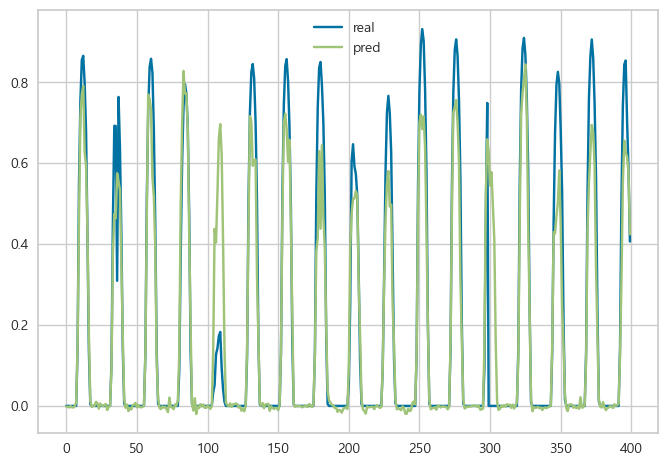

In [326]:
plt.plot(sc_y_test[:400], label='real')
plt.plot(final_result.prediction_label[:400], label='pred')
plt.legend()
plt.show()

In [327]:
inver = mn.inverse_transform(final_result.prediction_label.values.reshape(-1,1))

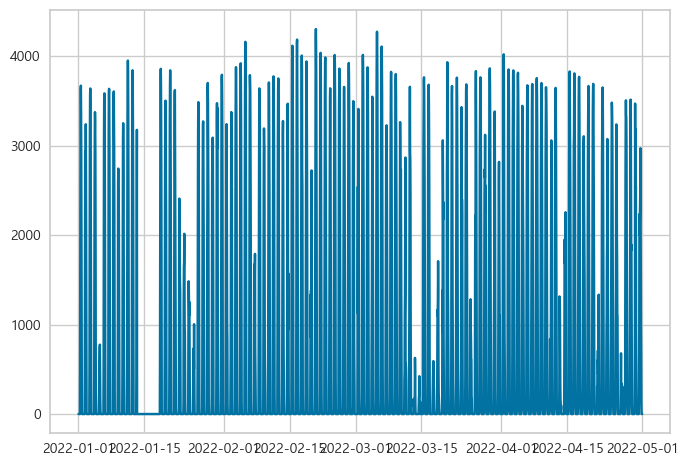

In [328]:
plt.plot(y_test)

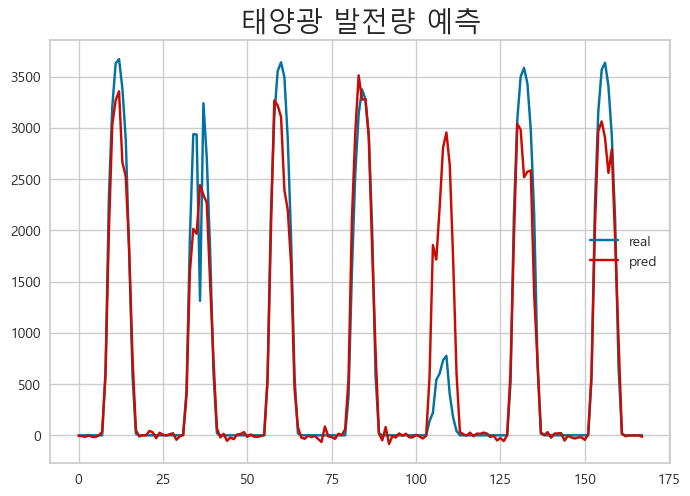

In [337]:
plt.plot(range(168), y_test[:168], label='real', color = 'b')
plt.plot(inver[:168], label='pred', color = 'r')
plt.legend()
plt.title('태양광 발전량 예측', fontsize = 20)
plt.show()

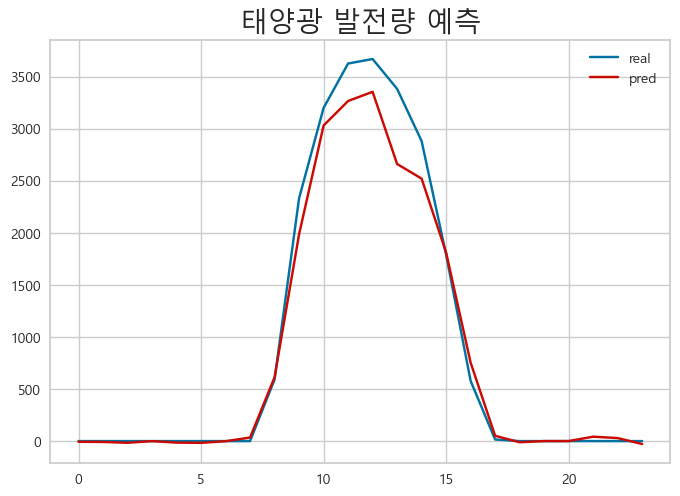

In [338]:
plt.plot(range(24), y_test[:24], label='real', color = 'b')
plt.plot(inver[:24], label='pred', color = 'r')
plt.legend()
plt.title('태양광 발전량 예측', fontsize = 20)
plt.show()

In [330]:
lig_result = predict_model(lgbr_best).sort_index()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.0590,0.0124,0.1112,0.8306,0.0812,1.6918


In [331]:
evaluate_model(lgbr_best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [332]:
lig_result

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target,prediction_label
0,0.194175,0.161290,0.055556,0.597701,0.0,0.000000,0.0,0.0,0.000000,-0.003102
2,0.188350,0.080645,0.055556,0.586207,0.0,0.086957,0.0,0.0,0.000000,-0.005152
11,0.297087,0.185484,0.444444,0.448276,0.0,0.478261,0.0,0.0,0.612940,0.575138
14,0.363107,0.145161,0.638889,0.505747,0.0,0.608696,0.0,0.0,0.452702,0.597918
15,0.355340,0.161290,0.638889,0.574713,0.0,0.652174,0.0,0.0,0.379138,0.484651
...,...,...,...,...,...,...,...,...,...,...
8741,0.203883,0.580645,0.805556,0.333333,0.0,0.217391,1.0,0.0,0.000000,-0.002240
8745,0.188350,0.532258,0.888889,0.298851,0.0,0.391304,1.0,0.0,0.139583,0.228693
8751,0.246602,0.338710,0.805556,0.229885,0.0,0.652174,1.0,0.0,0.741111,0.691934
8754,0.236893,0.362903,0.888889,0.252874,0.0,0.782609,1.0,0.0,0.001603,0.039415


lig_result[['target','prediction_label']].iloc[250:300,:].plot()